In [2]:
import requests

url = "https://d3e6htiiul5ek9.cloudfront.net/prod/productos"
params = {
    "string": "stevia",
    "array_sucursales":"23-1-6256, 12-1-95, 10-1-41, 10-1-32, 23-1-6262, 12-1-165, 2002-1-101, 10-1-268, 12-1-99, 23-1-6257, 2002-1-6, 12-1-97, 23-1-6260, 2002-1-67, 19-1-00812, 2002-1-38, 24-1-292, 10-1-18, 10-1-33, 2002-1-166, 23-1-6264",
    "offset": 0,
    "limit": 50,
    "sort": "-cant_sucursales_disponible"
}

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:128.0) Gecko/20100101 Firefox/128.0",
    "Accept": "application/json, text/plain, */*",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br, zstd",
    "Origin": "https://www.preciosclaros.gob.ar",
    "Connection": "keep-alive",
    "Referer": "https://www.preciosclaros.gob.ar/",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "cross-site",
    "TE": "trailers"
}

response = requests.get(url, params=params, headers=headers)

In [4]:
productos = response.json()["productos"]
for producto in productos:
    print(f"ID:{producto['id']} - {producto['nombre']} - {producto['marca']} - {producto['presentacion']} - ${producto['precioMin']} - ${producto['precioMax']}")

ID:7792540250450 - Azucar Molida Superior Ledesma 1 Kg - LEDESMA - 1.0 kg - $1179.0 - $1190.0
ID:7791720029619 - Azucar Comun Tipo A Carrefour Classic 1 Kg - CARREFOUR CLASSIC - 1.0 kg - $999.0 - $999.0
ID:7798174970016 - Azucar Comun Azucel 1 Kg - AZUCEL - 1.0 kg - $990.0 - $990.0
ID:7792540294607 - Azucar Rubio Mascabo Ledesma 800 Gr - LEDESMA - 800.0 gr - $1855.0 - $1855.0
ID:7791720038475 - Azucar Impalpable Carrefour Classic Sobre X 100 Gr - CARREFOUR CLASSIC - 1.0 uni - $490.0 - $490.0
ID:7795513048788 - Azucar Comun La Perla 1 Kg - LA PERLA - 1.0 kg - $1200.0 - $1200.0
ID:7790895067532 - Coca Cola sin Azucar 500 Cc - COCA COLA - 500.0 cc - $1040.0 - $1770.0
ID:7790895067556 - Coca Cola sin Azucar 1.5 Lt - COCA COLA - 1.5 lt - $2190.0 - $3900.0
ID:7790895643903 - Gaseosa sin Azucar Schweppes 6 Un 310 Cc - SCHWEPPES - 310.0 cc - $850.0 - $1550.0
ID:7790950143690 - Aperitivo Amargo Pomelo sin Azucar Terma 1.35 Lt - TERMA - 1.35 lt - $1739.0 - $1920.0
ID:7790580121303 - Mermelada si

In [5]:
ids = ['7792540260138','0727373097528','0076625270616', '7798141971381','7791720029619','7792540250450','7795513048788','7790220000746','7798174970016','7791100000481']

for producto in productos:
    if producto['id'] in ids:
        print(f"ID:{producto['id']} - {producto['nombre']} - {producto['marca']} - {producto['presentacion']} - ${producto['precioMin']} - ${producto['precioMax']}")

#save the products into a csv
import csv
with open('productos.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Nombre", "Marca", "Presentacion", "Precio Min", "Precio Max"])
    for producto in productos:
        if producto['id'] in ids:
            writer.writerow([producto['id'], producto['nombre'], producto['marca'], producto['presentacion'], producto['precioMin'], producto['precioMax']])

ID:7792540250450 - Azucar Molida Superior Ledesma 1 Kg - LEDESMA - 1.0 kg - $1179.0 - $1190.0
ID:7791720029619 - Azucar Comun Tipo A Carrefour Classic 1 Kg - CARREFOUR CLASSIC - 1.0 kg - $999.0 - $999.0
ID:7798174970016 - Azucar Comun Azucel 1 Kg - AZUCEL - 1.0 kg - $990.0 - $990.0
ID:7795513048788 - Azucar Comun La Perla 1 Kg - LA PERLA - 1.0 kg - $1200.0 - $1200.0


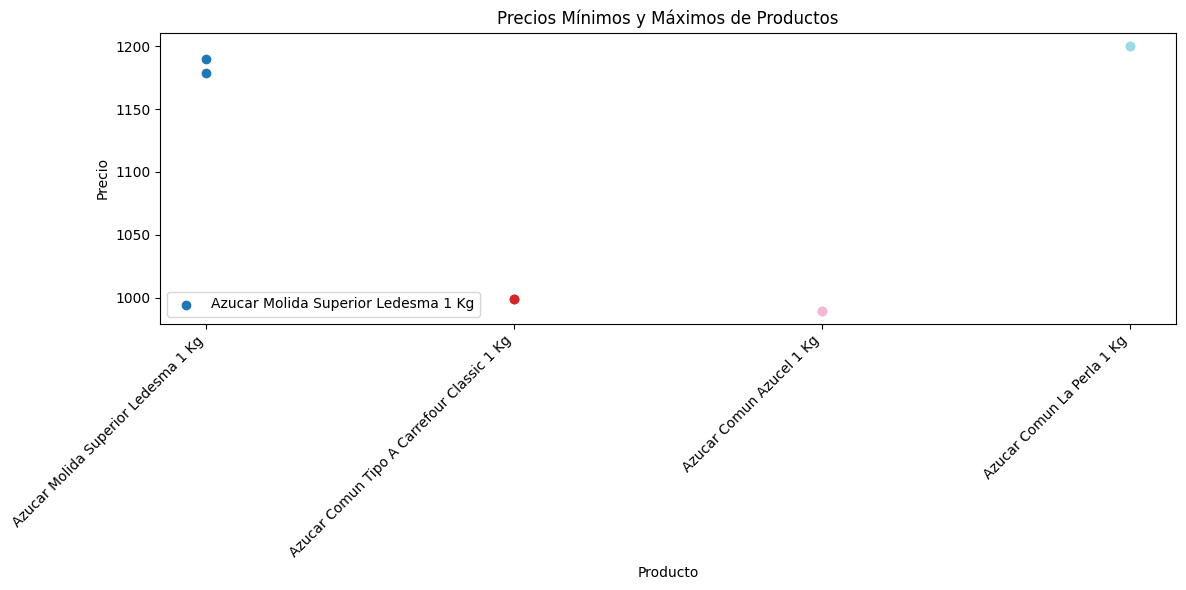

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Cargar los datos del CSV
data = pd.read_csv('productos.csv')

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Generar colores únicos para cada producto
colors = plt.cm.tab20(np.linspace(0, 1, len(data)))

# Plotear los precios mínimos y máximos con colores diferentes
for i, row in data.iterrows():
    plt.scatter(row['Nombre'], row['Precio Min'], color=colors[i], label=row['Nombre'] if i == 0 else "")
    plt.scatter(row['Nombre'], row['Precio Max'], color=colors[i])

# Añadir títulos y etiquetas
plt.title('Precios Mínimos y Máximos de Productos')
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [18]:
import requests

import pandas as pd

#get the ids from the csv
data = pd.read_csv('productos.csv')
ids = data['ID'].tolist()

for id in ids:

    url = "https://d3e6htiiul5ek9.cloudfront.net/prod/producto"
    params = {
        "limit": 30,
        "id_producto": id,
        "array_sucursales": "23-1-6256,12-1-95,10-1-41,10-1-32,23-1-6262,12-1-165,2002-1-101,10-1-268,12-1-99,23-1-6257,2002-1-6,12-1-97,23-1-6260,2002-1-67,19-1-00812,2002-1-38,24-1-292,10-1-18,10-1-33,2002-1-166,23-1-6264"
}


    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:128.0) Gecko/20100101 Firefox/128.0",
        "Accept": "application/json, text/plain, */*",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate, br, zstd",
        "Origin": "https://www.preciosclaros.gob.ar",
        "Connection": "keep-alive",
        "Referer": "https://www.preciosclaros.gob.ar/",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "cross-site",
        "TE": "trailers"
    }

    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        print(id)
        print(response.json())

7792540250450
{'status': 200, 'totalPagina': 21, 'producto': {'precio_unitario_bulto_min_sin_iva': None, 'precio_bulto_min_con_iva': None, 'precio_unitario_bulto_max_sin_iva': None, 'marca': 'LEDESMA', 'precio_bulto_max_sin_iva': None, 'id': '7792540250450', 'precio_bulto_min_sin_iva': None, 'precioMax': 1190.0, 'precio_unitario_bulto_max_con_iva': None, 'precioMin': 1179.0, 'nombre': 'Azucar Molida Superior Ledesma 1 Kg', 'precio_unitario_bulto_min_con_iva': None, 'precio_bulto_max_con_iva': None, 'presentacion': '1.0 kg', 'cantSucursalesDisponible': 7}, 'maxLimitPermitido': 50, 'sucursalesConProducto': 7, 'total': 611, 'sucursales': [{'message': 'La sucursal no contiene el producto.', 'comercioId': '23', 'id': '6256', 'banderaId': '1'}, {'banderaId': 1, 'unidad_venta': '', 'lat': '-32.9446397', 'lng': '-60.6778049', 'sucursalNombre': 'LA REINA', 'id': '95', 'sucursalTipo': 'Supermercado', 'provincia': 'AR-S', 'preciosProducto': {'promo1': {'descripcion': 'DEL 10/08/2024 AL 13/08/2024

In [17]:
import requests

url = "https://d3e6htiiul5ek9.cloudfront.net/prod/producto"
params = {
    "limit": 30,
    "id_producto": "7792540260138",
    "array_sucursales": "10-1-31,19-1-01956,9-1-711,2002-1-84,10-2-134,2005-1-18,36-5-73,2005-1-29,13-1-40,19-1-01173,13-1-20,2-1-185,2005-1-9,13-1-56,2005-1-28,36-6-40,10-1-58,13-1-112,3-1-1682,19-1-01817,10-2-296,13-1-36,11-5-1054,13-1-37,10-1-139,2005-1-12,13-1-59,36-4-51,2005-1-31,13-1-39"
}
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-US,en;q=0.9",
    "origin": "https://www.preciosclaros.gob.ar",
    "priority": "u=1, i",
    "referer": "https://www.preciosclaros.gob.ar/",
    "sec-ch-ua": '"Not)A;Brand";v="99", "Microsoft Edge";v="127", "Chromium";v="127"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": '"Windows"',
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "cross-site",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 Edg/127.0.0.0",
    "x-api-key": "zIgFou7Gta7g87VFGL9dZ4BEEs19gNYS1SOQZt96"
}

response = requests.get(url, params=params, headers=headers)
print(response.json())

{'status': 200, 'totalPagina': 30, 'producto': {'precio_unitario_bulto_min_sin_iva': None, 'precio_bulto_min_con_iva': None, 'precio_unitario_bulto_max_sin_iva': None, 'marca': 'LEDESMA', 'precio_bulto_max_sin_iva': None, 'id': '7792540260138', 'precio_bulto_min_sin_iva': None, 'precioMax': 1165.0, 'precio_unitario_bulto_max_con_iva': None, 'precioMin': 1129.0, 'nombre': 'Azucar Molida Clasica Ledesma 1 Kg', 'precio_unitario_bulto_min_con_iva': None, 'precio_bulto_max_con_iva': None, 'presentacion': '1.0 kg', 'cantSucursalesDisponible': 9}, 'maxLimitPermitido': 50, 'sucursalesConProducto': 9, 'total': 211, 'sucursales': [{'message': 'La sucursal no contiene el producto.', 'comercioId': '10', 'id': '31', 'banderaId': '1'}, {'message': 'La sucursal no contiene el producto.', 'comercioId': '19', 'id': '01956', 'banderaId': '1'}, {'message': 'La sucursal no contiene el producto.', 'comercioId': '9', 'id': '711', 'banderaId': '1'}, {'message': 'La sucursal no contiene el producto.', 'comerc